In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sys
sys.path.append(r'..')

from data import read_svm_data

In [13]:
training_labels, training_images = read_svm_data("training", r"../../MNIST_ORG", [2, 3, 8, 9])
testing_labels, testing_images = read_svm_data("testing", r"../../MNIST_ORG", [2, 3, 8, 9])

training_images = training_images.astype(np.float64) / 255.0
testing_images = testing_images.astype(np.float64) / 255.0
classifiers = {}
classes = [2, 3, 8, 9]


In [14]:
support_vectors = {}

for class_label in classes:
    print(f"\nTraining classifier for class {class_label}")
    # 1 for the current class, 0 for all others
    binary_target = (training_labels == class_label).astype(int)
    
    classifier = SVC(kernel='poly', C=1, verbose=True)
    classifier.fit(training_images, binary_target)
    classifiers[class_label] = classifier
    
    # Store support vectors
    support_vectors[class_label] = classifier.support_vectors_

def predict_one_vs_rest(classifiers, images):
    scores = np.column_stack([
        clf.decision_function(images) for clf in classifiers.values()
    ])
    predicted_class_indices = np.argmax(scores, axis=1)
    predicted_classes = [classes[i] for i in predicted_class_indices]
    
    return predicted_classes

predictions = predict_one_vs_rest(classifiers, training_images)
accuracy = accuracy_score(training_labels, predictions)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

predictions = predict_one_vs_rest(classifiers, testing_images)
accuracy = accuracy_score(testing_labels, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Training classifier for class 2
[LibSVM]
Training classifier for class 3
[LibSVM]
Training classifier for class 8
[LibSVM]
Training classifier for class 9
[LibSVM]Training Accuracy: 99.59%
Test Accuracy: 99.12%


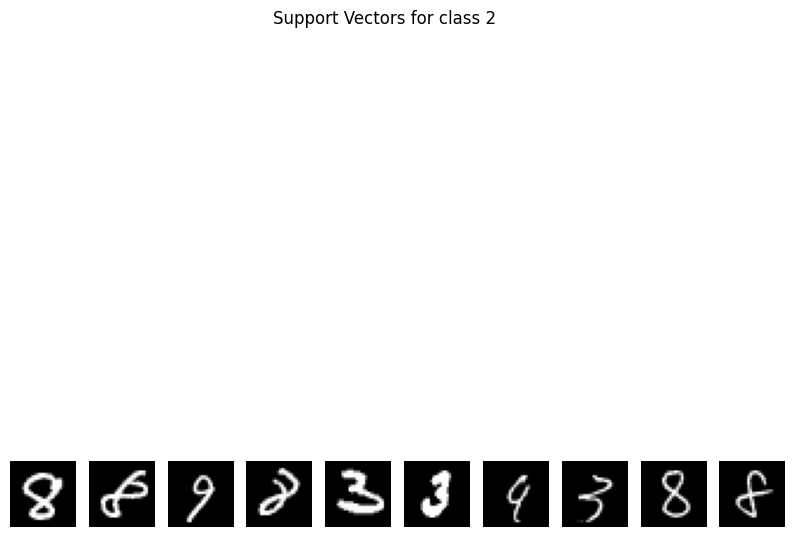

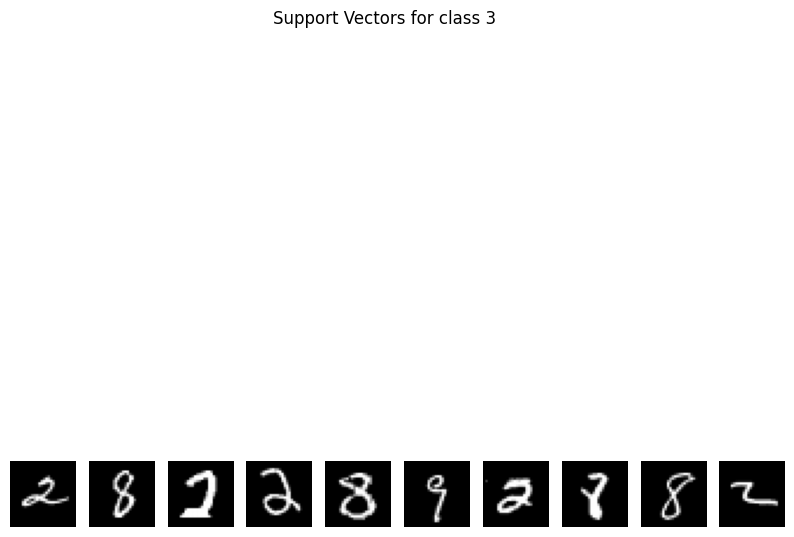

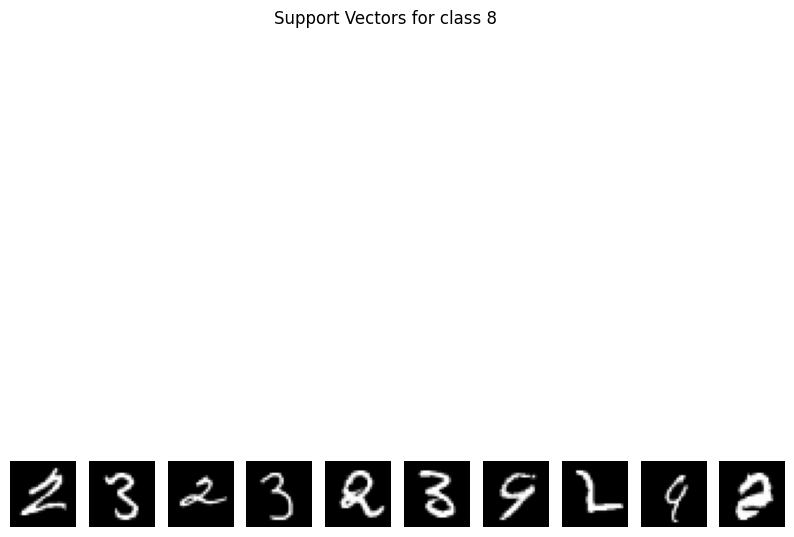

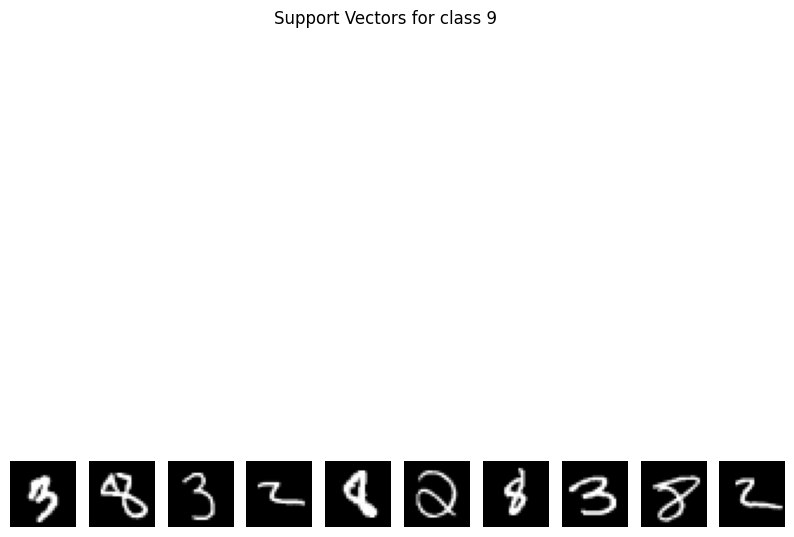

In [15]:
def plot_images(images, title, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

for class_label in classes:
    sv = support_vectors[class_label]
    plot_images(sv, f"Support Vectors for class {class_label}")
